### 대선자료 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 자료 불러오기
election = pd.read_csv("../Data/election_2022.csv")
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [3]:
election.tail()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,산청군,31645,24913,7125,16607,464
244,경상남도,거창군,53049,41399,11963,27254,895
245,경상남도,합천군,39768,31270,6911,22742,511
246,제주특별자치도,제주시,408552,296826,157695,122084,10007
247,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [8]:
election.shape

(248, 7)

In [5]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [6]:
# 기본 통계량
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [9]:
# 컬럼명만 확인
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

### 3개정당 지지도가 전체 투표수의 몇%인가?

In [13]:
# electionSum이라는 컬럼에 이재명, 윤석열, 심상정의 합계 넣기 
election['electionSum'] = election.loc[:,['이재명','윤석열','심상정']].sum(axis='columns')
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [18]:
# electionRatio라는 컬럼에 electionSum이 투표수의 몇%인지 계산해 넣기
election['electionRatio'] = round(election.electionSum / election.투표수 * 100, 2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [19]:
# csv로 저장하기 : election_2022_job01.csv 
election.to_csv("../Data/election_2022_job01.csv", index=False)

----
### 광역시도별 투표율을 Pie Chart로 표현하기

In [23]:
# 광역시도의 갯수 
len(election.광역시도.unique())

17

In [25]:
# 광역시도별 투표수의 합계를 집계
elec_sum = \
    election.pivot_table(
        '투표수',
        index='광역시도',
        aggfunc='sum'
    )

elec_sum

,투표수
광역시도,
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831


In [27]:
# elec_sum을 투표수 순으로 내림차순으로 정렬
elec_sum_order = elec_sum.sort_values('투표수', ascending=False)
elec_sum_order

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284
대구광역시,1611512
충청남도,1324660
전라남도,1282168


In [29]:
# 한글 폰트 설정
import koreanize_matplotlib

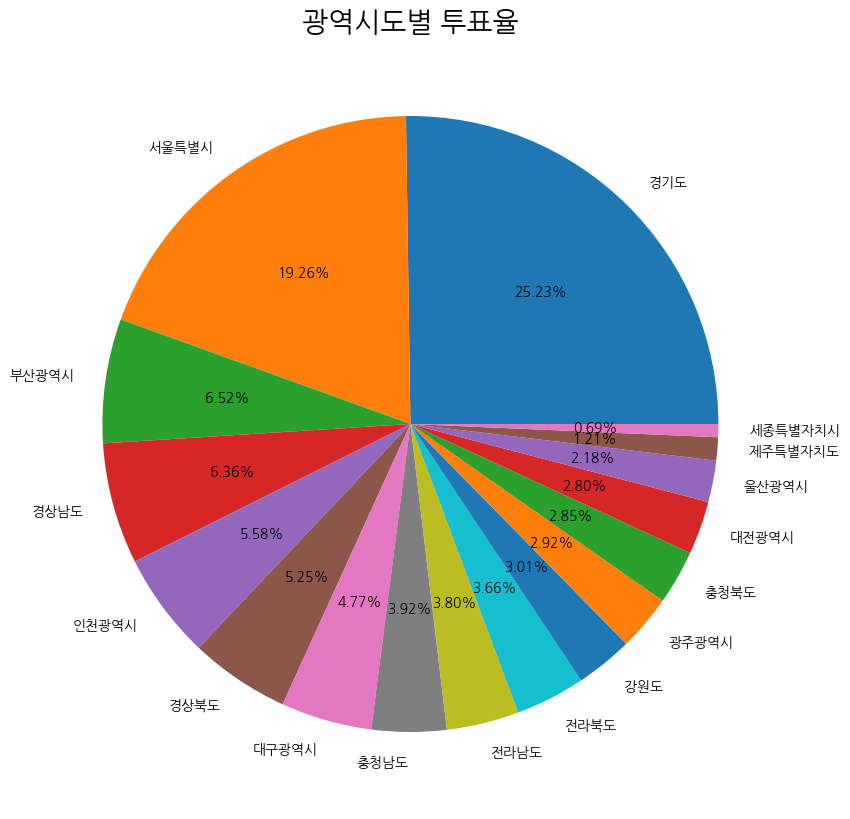

In [34]:
elec_sum_order.투표수.plot(
    kind='pie',
    figsize=(10, 10),
    autopct = '%.2f%%'
)

plt.title("광역시도별 투표율", size=20)
plt.ylabel('')
plt.show()

In [43]:
# 수도권의 투표수가 전체 투표수의 몇 퍼센트? (수도권 : 서울, 경기도, 인천)
elec_sum_order.loc[['서울특별시', '경기도', '인천광역시'],:].sum() / \
    elec_sum_order.loc[:,'투표수'].sum() * 100

투표수    50.064733
dtype: float64

---
### 윤석열 후보의 광역시도별 득표율

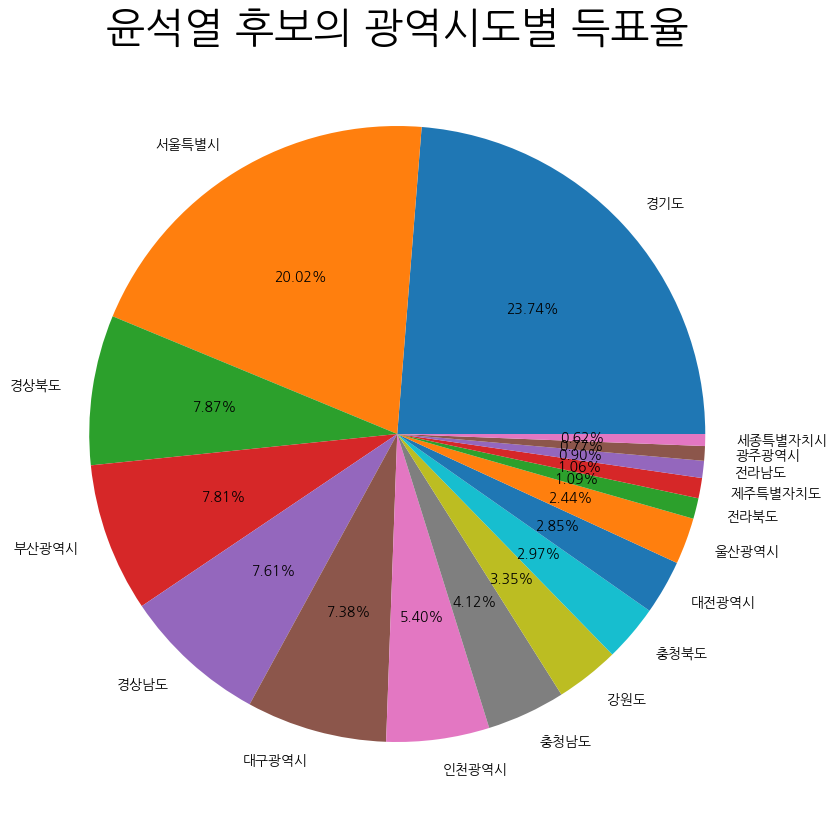

In [47]:
# 광역시도 기준으로 데이터 수집하기
elec_윤석열 = \
    election.pivot_table(
        "윤석열",
        aggfunc='sum',
        index='광역시도'
    )

# 데이터 정렬
elec_윤석열 = \
    elec_윤석열.sort_values('윤석열', ascending=False)

# 데이터 시각화 
elec_윤석열.윤석열.plot(
    kind='pie',
    figsize=(10, 10),
    autopct = "%.2f%%"
)

plt.title("윤석열 후보의 광역시도별 득표율", size=30)
plt.ylabel('')
plt.show()

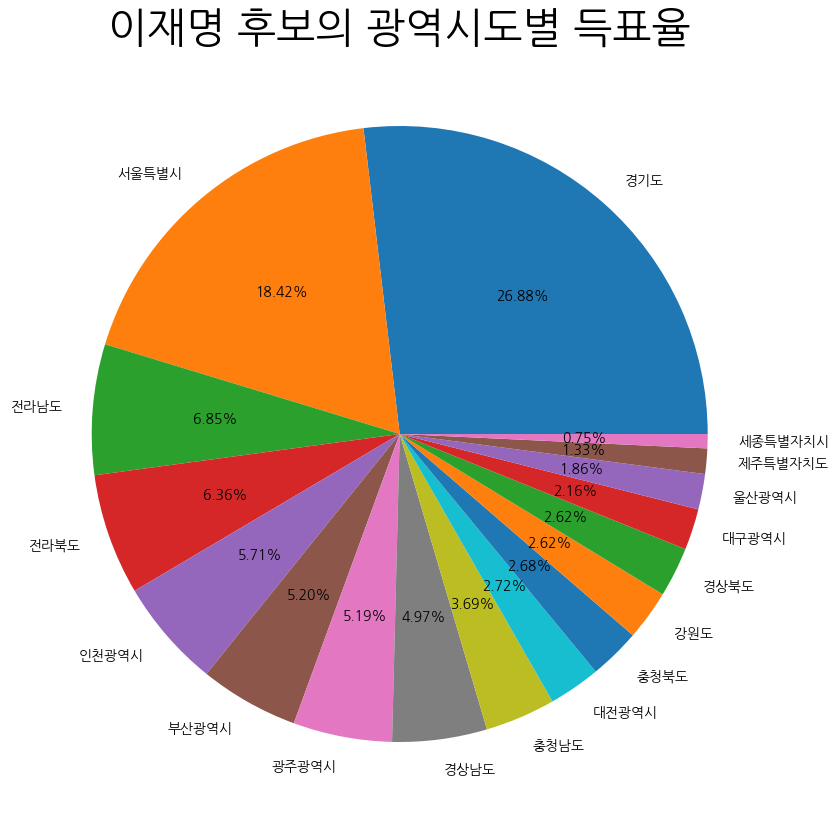

In [48]:
# 광역시도 기준으로 데이터 수집하기
elec_이재명 = \
    election.pivot_table(
        "이재명",
        aggfunc='sum',
        index='광역시도'
    )

# 데이터 정렬
elec_이재명 = \
    elec_이재명.sort_values('이재명', ascending=False)

# 데이터 시각화 
elec_이재명.이재명.plot(
    kind='pie',
    figsize=(10, 10),
    autopct = "%.2f%%"
)

plt.title("이재명 후보의 광역시도별 득표율", size=30)
plt.ylabel('')
plt.show()

---
### 윤석열 후보의 서울 득표 Top5

In [51]:
# 서울특별시 데이터만 추출

election_seoul = election[election.광역시도 == "서울특별시"]
election_seoul.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [54]:
# 윤석열 컬럼으로 내림차순 정렬

election_seoul_윤석열 = \
    election_seoul.sort_values("윤석열", ascending=False).loc[:,['시군구', '윤석열']]
election_seoul_윤석열.head()

,시군구,윤석열
23,송파구,255166
22,강남구,235897
15,강서구,181510
21,서초구,179472
10,노원구,163340


In [60]:
# label 만들기
election_seoul_윤석열_label = \
    pd.concat([election_seoul_윤석열.iloc[:5,0], pd.Series("기타")], ignore_index=True)
election_seoul_윤석열_label

0    송파구
1    강남구
2    강서구
3    서초구
4    노원구
5     기타
dtype: object

In [ ]:
# Data 만들기
election_seoul_윤석열_Data = \
    pd.concat([election_seoul_윤석열.iloc[:5,1], 
            pd.Series(election_seoul_윤석열.iloc[5:,1].sum())], 
            ignore_index=True)
election_seoul_윤석열_Data

0     255166
1     235897
2     181510
3     179472
4     163340
5    2240362
dtype: int64

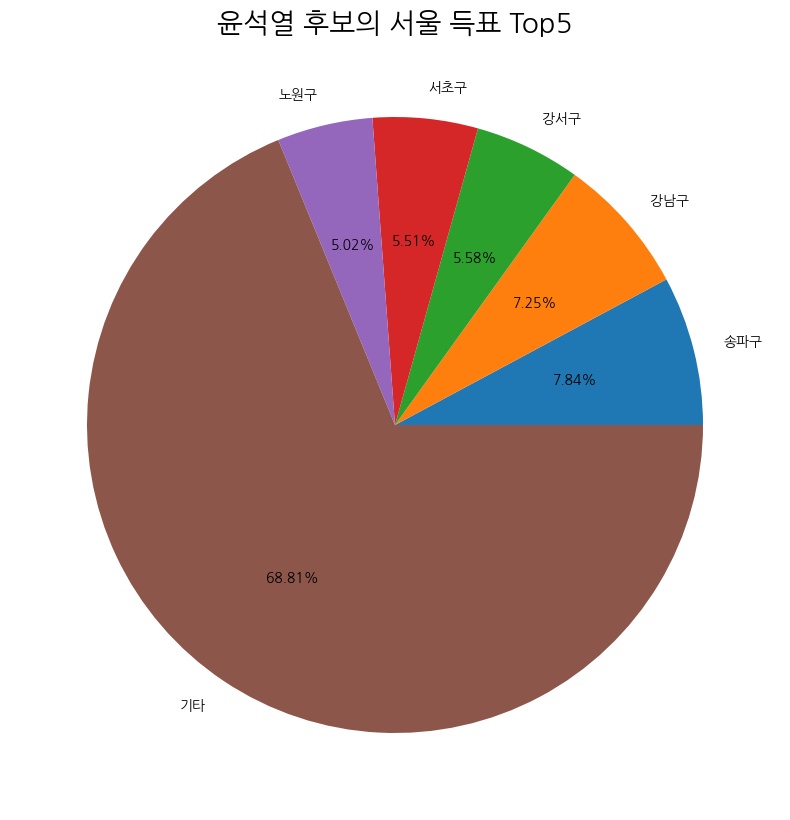

In [65]:
# Pie Chart
election_seoul_윤석열_Data.plot(
    kind='pie',
    figsize=(10, 10),
    autopct = "%.2f%%",
    labels = election_seoul_윤석열_label
)
plt.title("윤석열 후보의 서울 득표 Top5", size=20)
plt.show()

---
### 대선주자 출생지별 득표율 분석
: 윤석열 후보의 출생지는 서울특별시 성북구

In [68]:
# 시군구가 성북구

pob_윤석열 = election[election.시군구 == "성북구"]
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [76]:
pob_윤석열_data = \
    pd.concat(
        [
            pob_윤석열['윤석열'],
            pob_윤석열['이재명'],
            pob_윤석열['심상정'],
            pob_윤석열['투표수'] - pob_윤석열['electionSum']
        ],
        ignore_index=True
    )
pob_윤석열_data

0    135044
1    142702
2      8952
3      5489
dtype: int64

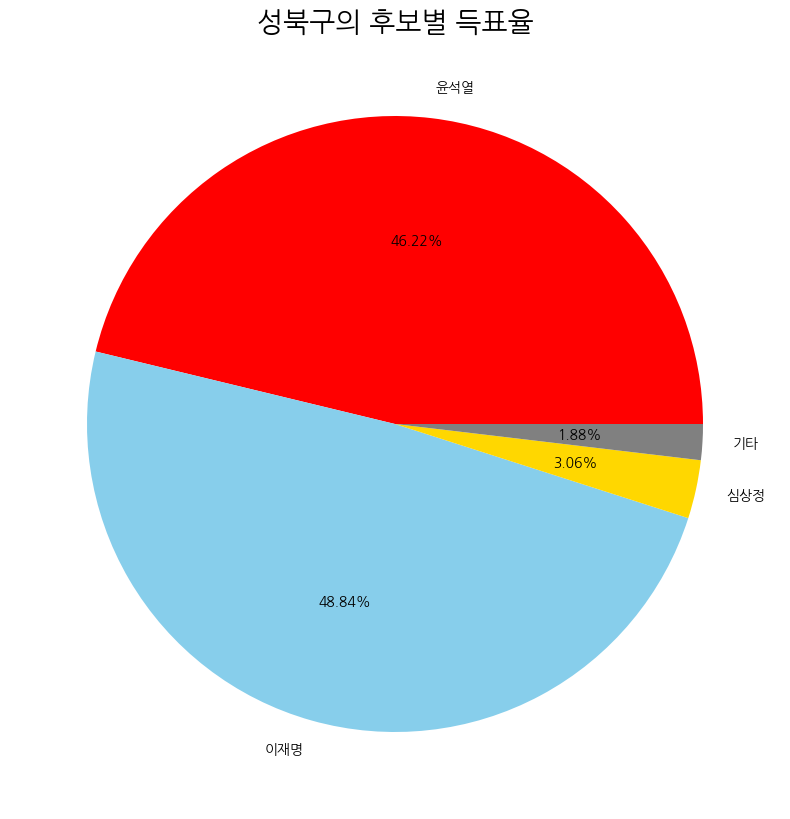

In [78]:
pob_윤석열_data.plot(
    kind='pie',
    figsize=(10,10),
    autopct = '%.2f%%',
    labels = ['윤석열','이재명','심상정','기타'],
    colors = ['red', 'skyblue','gold','grey']
)

plt.title('성북구의 후보별 득표율', size=20)
plt.show()

---
### 투표수가 높은 5군데 시군구의 후보별 득표수를 막대 그래프로 표현

In [84]:
# Data 구하기
elec_top5 = \
    election.sort_values(
        '투표수',
        ascending=False
    ).iloc[:5,4:6+1].reset_index(drop=True)
elec_top5

,이재명,윤석열,심상정
0,283324,236055,12955
1,285227,224331,13249
2,239179,203075,10089
3,180490,255166,10652
4,190000,181510,11100


In [89]:
elec_top5.index = \
    election.sort_values(
        '투표수',
        ascending=False
    ).iloc[:5,0].reset_index(drop=True) \
    + " " +\
    election.sort_values(
        '투표수',
        ascending=False
    ).iloc[:5,1].reset_index(drop=True)
elec_top5

,이재명,윤석열,심상정
경기도 화성시,283324,236055,12955
경기도 부천시,285227,224331,13249
경기도 남양주시,239179,203075,10089
서울특별시 송파구,180490,255166,10652
서울특별시 강서구,190000,181510,11100


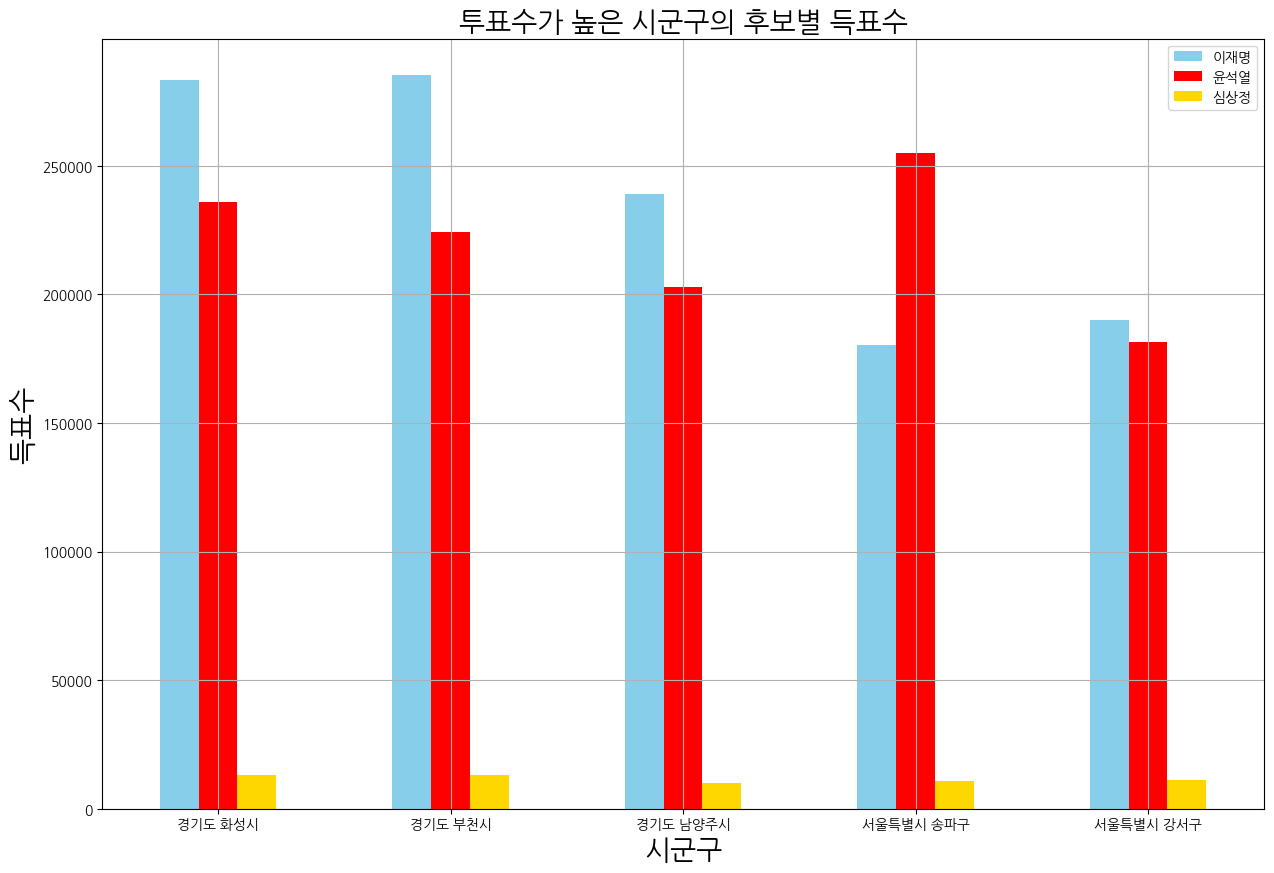

In [97]:
# 막대 그래프

elec_top5.plot(
    kind='bar',
    figsize=(15, 10),
    color = ['skyblue', 'red', 'gold'],
    rot=0
)

plt.grid()
plt.title('투표수가 높은 시군구의 후보별 득표수', size=20)
plt.xlabel('시군구', size=20)
plt.ylabel('득표수', size=20)
plt.show()